# Bathymetry for Barkley Canyon

Uses General Bathymetric Chart of the Ocean (GEBCO) NetCDF data to create an approximate bathymetry plot for Barkley Canyon. This plot is NOT scaled to WGS84 coordinate system, but is approximately accurate.

## Imports

In [2]:
# import modules

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import cmocean
from matplotlib.ticker import FormatStrFormatter
%matplotlib notebook

In [3]:
# import regional data

ds = xr.open_dataset('../../../Data/Bathymetry/british_columbia_3_msl_2013.nc')
#print(ds.publisher_name)
#print(ds)

## Topography and bathymetry output

In [4]:
# Upper Slope topography data

upper_slope_loc = ds.Band1[453,13532]
upper_slope_critical = ds.Band1[453,12600:13800]
upper_slope_rise = ds.Band1[453,13557].values - ds.Band1[453,13507].values
upper_slope_run_km = 3.074        # km E-W, from 'haversine' formula
upper_slope_axis_km = 73.78
upper_slope_run_axis = np.linspace(0,upper_slope_axis_km,len(upper_slope_critical.lon))
upper_slope_beta = upper_slope_rise / (upper_slope_run_km*1000)

In [5]:
# Axis topography data

axis_loc = ds.Band1[321,13680]
axis_critical = ds.Band1[450:300:-1,13680]
axis_rise = ds.Band1[333,13680].values - ds.Band1[300,13680].values
axis_run_km = 3.058   # km N-S, from 'haversine' formula
axis_axis_km = 13.9
axis_run_axis = np.linspace(0,axis_axis_km,len(axis_critical.lat))
axis_beta = axis_rise / (axis_run_km*1000)

<IPython.core.display.Javascript object>


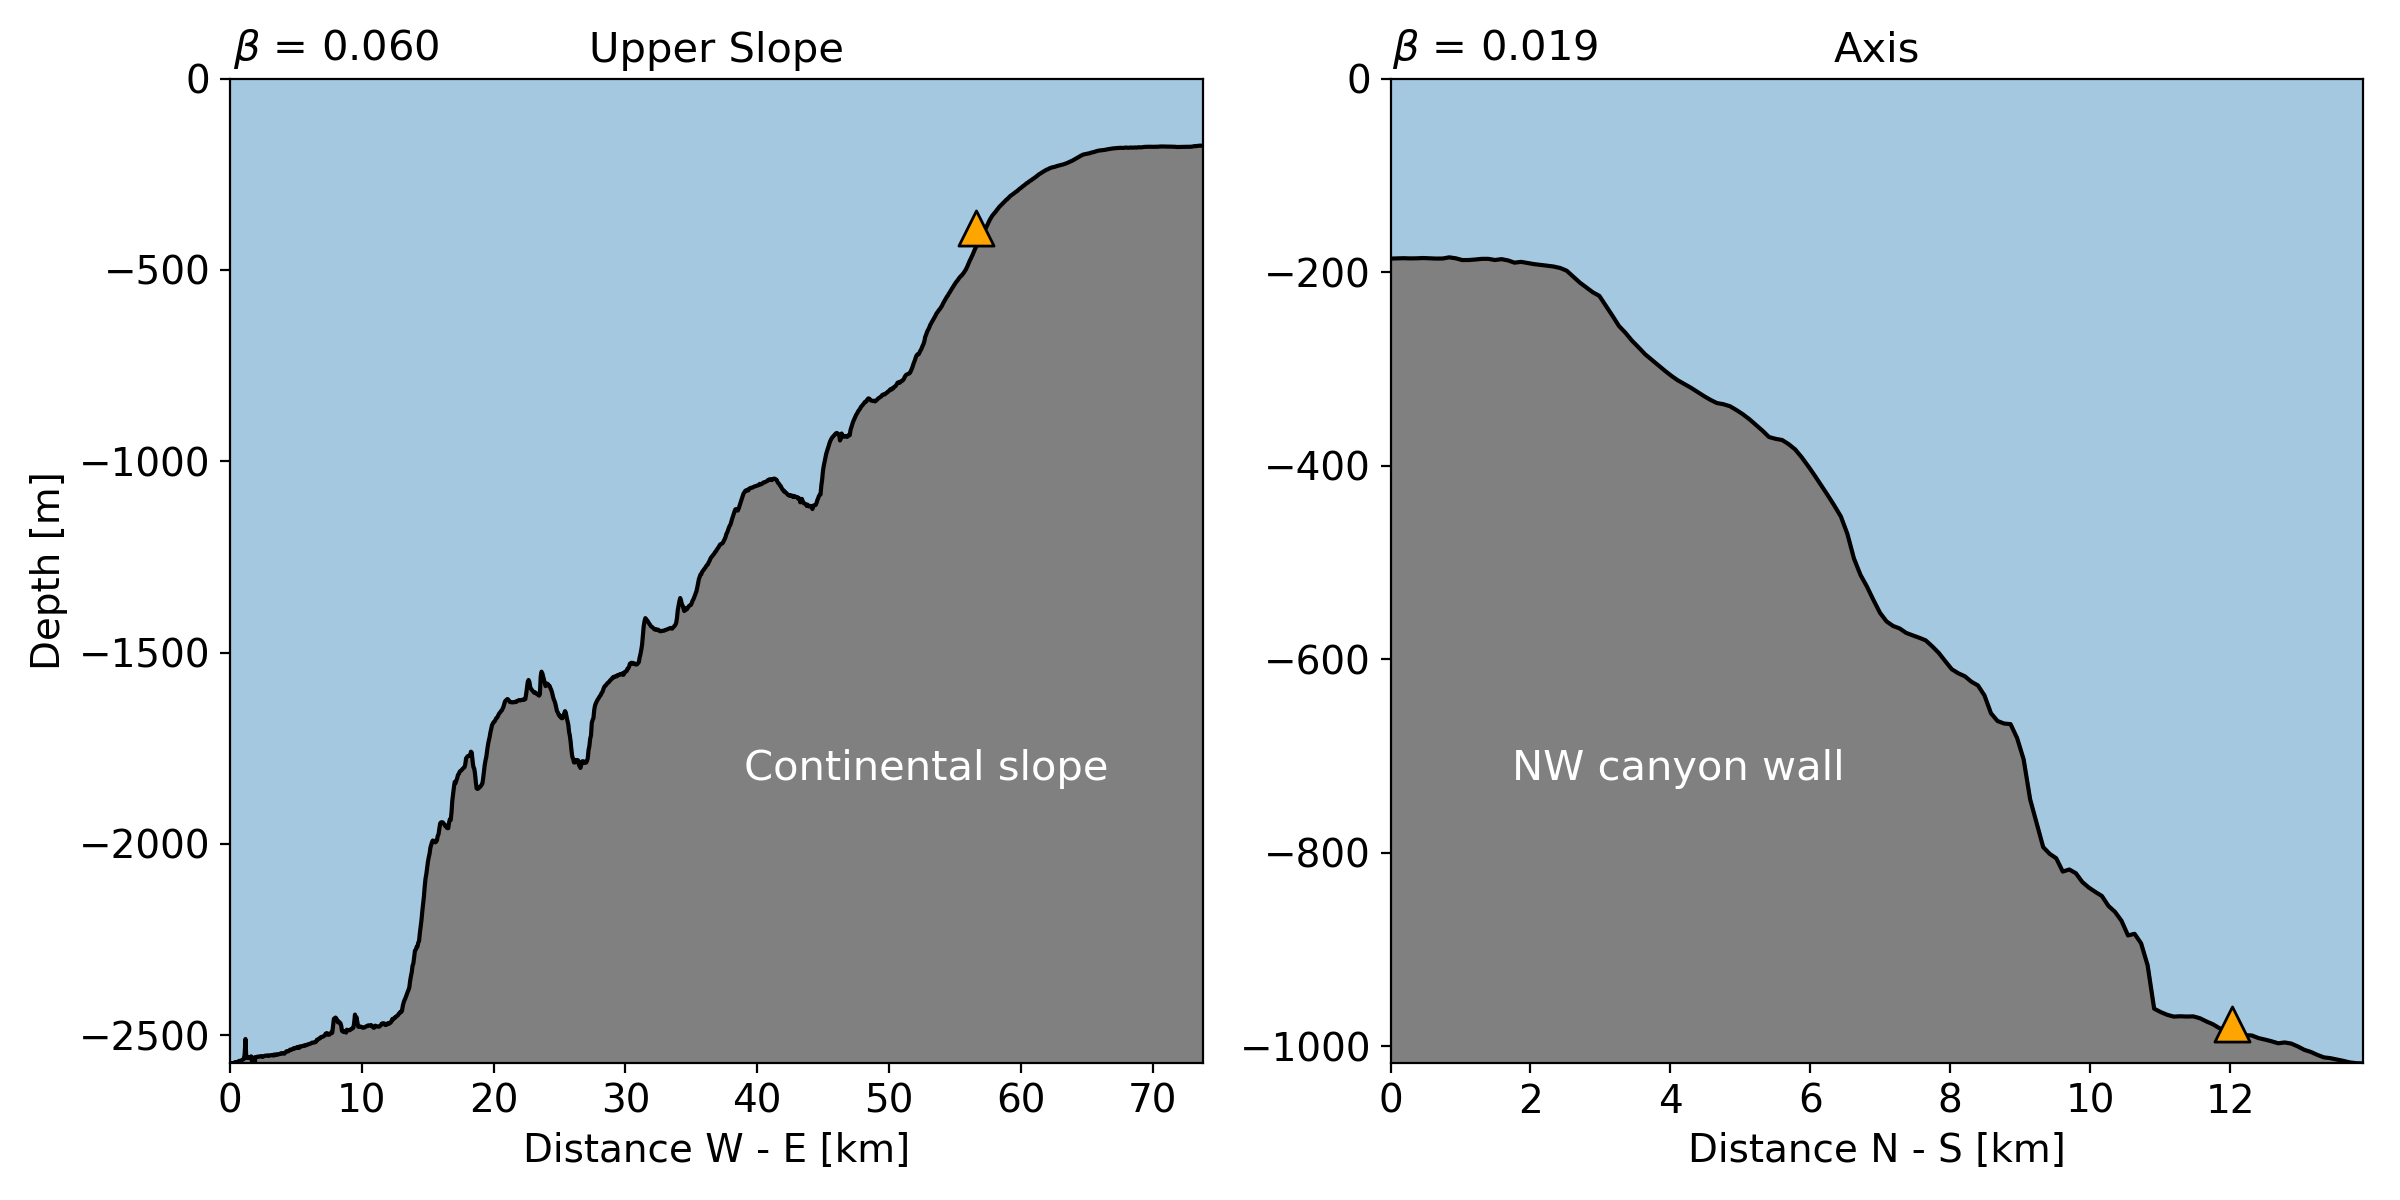

In [20]:
# plot local topography cross-sections

fig,(ax0,ax1) = plt.subplots(1,2,figsize=(12,6))
fig.subplots_adjust(wspace=0.18)

ax0.plot(upper_slope_run_axis,upper_slope_critical,color='black')
ax0.set_title('Upper Slope',fontsize=15)
ax0.set_xlabel('Distance W - E [km]',fontsize=14)
ax0.set_ylabel('Depth [m]',fontsize=14)
fig.text(0.097, 0.95, fr'$\beta$ = ''{:.3f}'.format(upper_slope_beta),fontsize=15)
ax0.set_xlim(0,upper_slope_axis_km)
ax0.set_ylim(upper_slope_critical[0],0)
ax0.tick_params(labelsize=14)
ax0.fill_between(upper_slope_run_axis,upper_slope_critical,alpha=0.4)
ax0.fill_between(upper_slope_run_axis,upper_slope_critical,y2=upper_slope_critical[0],color='grey')
ax0.scatter(upper_slope_run_axis[920],upper_slope_critical[932],color='orange',s=160,marker='^',linewidths=1,edgecolors='black',zorder=4)
fig.text(0.31, 0.35,'Continental slope',color='white',fontsize=15)

ax1.plot(axis_run_axis,axis_critical,color='black')
ax1.set_title('Axis',fontsize=15)
ax1.set_xlabel('Distance N - S [km]',fontsize=14)
fig.text(0.58, 0.95, fr'$\beta$ = ''{:.3f}'.format(axis_beta),fontsize=15)
ax1.set_xlim(0,axis_axis_km)
ax1.set_ylim(axis_critical[-1],0)
ax1.tick_params(labelsize=14)
ax1.fill_between(axis_run_axis,axis_critical,alpha=0.4)
ax1.fill_between(axis_run_axis,axis_critical,y2=axis_critical[-1],color='grey')
ax1.scatter(axis_run_axis[-21],axis_critical[-24],color='orange',s=160,marker='^',linewidths=1,edgecolors='black',zorder=4)
fig.text(0.63, 0.35,'NW canyon wall',color='white',fontsize=15)

fig.tight_layout()
plt.show()

plt.savefig(fname='./topography.pdf',format='pdf')

In [21]:
# define plotting region

lon = np.array(ds.lon.values[13490:13930])           # set desired region using lat and lon
lat = np.array(ds.lat.values[210:480])
elev = np.array(ds.Band1.values[210:480,13490:13930])

slope_lat = 48.427                                   # set specific coordinates for ADCP
slope_lon = -126.174
axis_lat = 48.317
axis_lon = -126.050

line_y = np.array([slope_lat-0.0025,axis_lat-0.003])  # set coordinates for distance line
line_x = np.array([slope_lon+0.000,axis_lon-0.001])

<IPython.core.display.Javascript object>


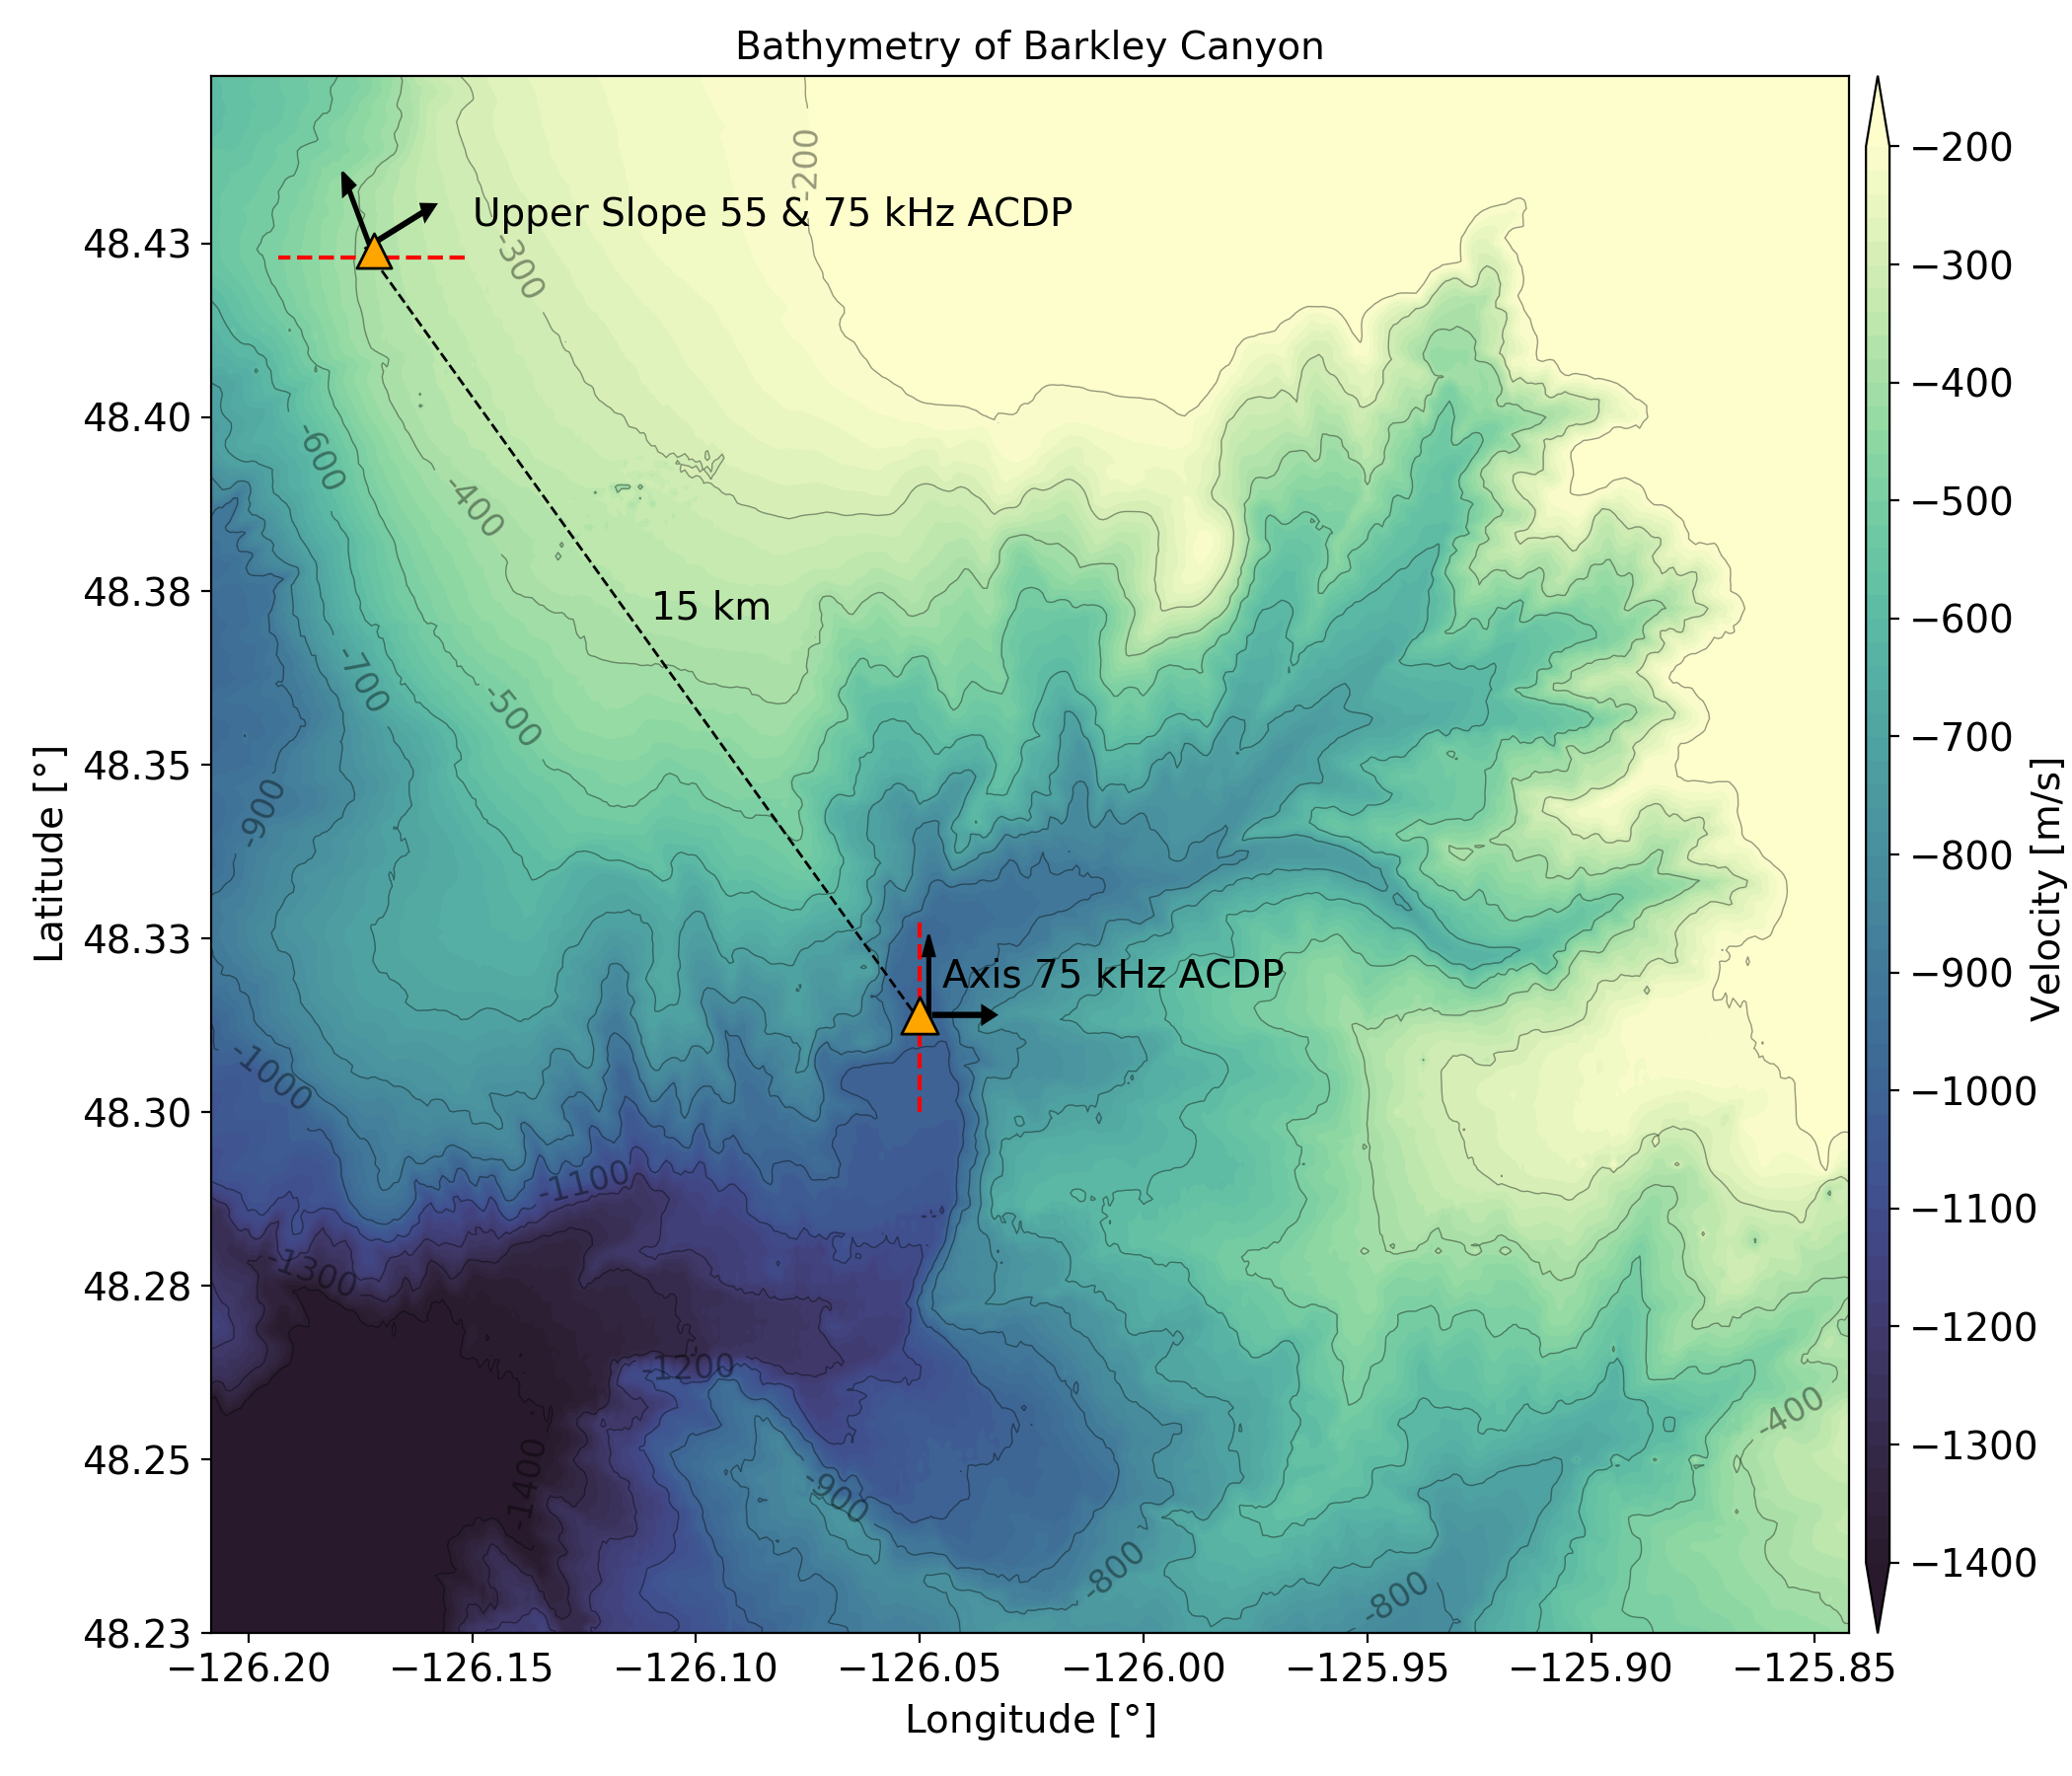

In [22]:
# plot bathymetry

fig, ax = plt.subplots(1,1,figsize=(10.5,9))

levels = 20       # set contour parameters for visual clarity and adjust colorbar
vmin = -1400
vmax = -200
ticks = np.arange(vmin,vmax+1,100)
level_boundaries = np.arange(vmin,vmax+1,levels)

im = ax.contourf(lon,lat,elev,levels=level_boundaries,vmin=vmin,vmax=vmax,extend='both',cmap='cmo.deep_r')
cbar = fig.colorbar(im,fraction=0.05,aspect=60,pad=0.01,ticks=ticks)
cbar.ax.tick_params(labelsize=14)
im1 = ax.contour(lon,lat,elev,levels=ticks,colors='black',linewidths=0.5,linestyles='solid',alpha=0.4)
ax.set_xlabel('Longitude [$\degree$]',fontsize=14)
ax.set_ylabel('Latitude [$\degree$]',fontsize=14)
fig.text(0.98, 0.5, 'Velocity [m/s]', va='center', rotation='vertical',fontsize=14)
ax.set_title('Bathymetry of Barkley Canyon',fontsize=14)

ax.plot(line_x,line_y,color='black',lw=1,ls='--')
ax.plot([-126.1516,-126.1933],[48.423,48.423],color='red',lw=1.5,ls='--')
ax.arrow(slope_lon+0.0015,slope_lat-0.003,-0.005,0.00866,color='black',width=0.0005,head_width=0.003,head_length=0.003)
ax.arrow(slope_lon+0.003,slope_lat-0.0015,0.01,0.004,color='black',width=0.0005,head_width=0.0025,head_length=0.003)
ax.arrow(axis_lon+0.003,axis_lat-0.003,0.011,0,color='black',width=0.0005,head_width=0.0025,head_length=0.003)
ax.arrow(axis_lon+0.002,axis_lat-0.004,0,0.0095,color='black',width=0.0005,head_width=0.0025,head_length=0.003)
ax.text(-126.15,48.4275,'Upper Slope 55 & 75 kHz ACDP',fontsize=14)
ax.text(-126.045,48.318,'Axis 75 kHz ACDP',fontsize=14)
ax.text(-126.110,48.371,'15 km',fontsize=14)
ax.scatter(slope_lon+0.002,slope_lat-0.003,color='orange',s=160,marker='^',linewidths=1,edgecolors='black',zorder=3)
ax.scatter(axis_lon,axis_lat-0.003,color='orange',s=180,marker='^',linewidths=1,edgecolors='black',zorder=3)
ax.plot([-126.050,-126.050],[48.299999,48.327499],color='red',lw=1.5,ls='--')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax.clabel(im1, ticks, inline=True, fontsize=12, fmt = '%.f')
ax.tick_params(labelsize=14)

fig.tight_layout()
plt.show()

plt.savefig(fname='./bathymetry.pdf',format='pdf')